In [1]:
a = 1000

In [2]:
#USING OPTIMIZATION ALGO
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt



# expected values
y = np.array([[0, 1, 1, 0]]).T

# features
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]]).T


model = Sequential()
model.add(Dense(16, input_dim=2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy', 'mean_squared_error'])

history = model.fit(X, y, epochs=1000, verbose=0)


errors = history.history['loss']

df2 = pd.DataFrame({"errors":errors, "time-step": np.arange(0, len(errors))})

alt.Chart(df2).mark_line().encode(x="time-step", y="errors").properties(title='Chart 3')


y_pred = model.predict(X).round()
num_correct_predictions = (y_pred == y).sum()
accuracy = (num_correct_predictions / y.shape[0]) * 100
print('Multi-layer perceptron accuracy: %.2f%%' % accuracy)

2026-02-10 04:07:31.483082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770696451.719689      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770696451.786726      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770696452.340267      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770696452.340311      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770696452.340314      55 computation_placer.cc:177] computation placer alr

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Multi-layer perceptron accuracy: 100.00%


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import altair as alt


df = pd.read_csv("/kaggle/input/mushroom/agaricus-lepiota.data",header=None)
X = df.iloc[:, 1:]
y = df.iloc[:, 0]


In [7]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [8]:
X_encoded = X.apply(LabelEncoder().fit_transform)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [10]:
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    verbose=0
)

In [28]:
loss = history.history['loss']

df_loss = pd.DataFrame({
    "epoch": range(len(loss)),
    "loss": loss
})

alt.Chart(df_loss).mark_line().encode(
    x="epoch",
    y="loss"
).properties(title="Training Loss vs Epoch (Mushroom Dataset)")


alt.Chart(...)

In [32]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"MLP Accuracy on Mushroom Dataset: {test_accuracy * 100:.2f}%")


MLP Accuracy on Mushroom Dataset: 100.00%


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


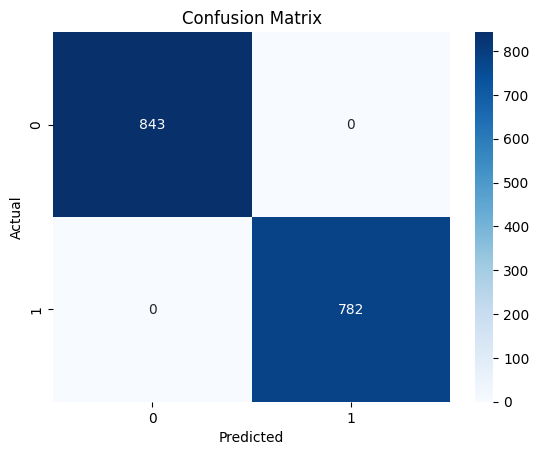

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = (model.predict(X_test) > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


after applying different optimizers such as adagrad, rmsprop, adam with different epochs, the mushroom dataset still gives 100% accuracy, showing it is cleanly classified, and that difference would be noticed during the convergence rather than model specification. Trying again with a different dataset this time.

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np
import altair as alt

In [34]:
data = load_breast_cancer()
X = data.data
y = data.target

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adadelta',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [67]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    verbose=0
)


In [68]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy: {acc*100:.2f}%")


Accuracy: 98.25%


usually its adam that performs well, the performance of models are usually in the order: 
1 adam
2 adadelta
3 rmsprop
4 adagrad
but here after performing on breast cancer dataset we've observed that rmsprop performs the best with 97.37% accuracy with adam coming second of 97.32% as expected, and adagrad and adadelta coming last with 79.82, 77.19% performing the worst as expected due to their harsh learning rate modifications. we also observe that after tuning adagrad performs the best with 99.12% accuracy, concluding that the performance of models to be in that order isnt a law, it heavily depends on tuning, type of dataset and the specifications.

In [66]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

optimizer performance isn't depended on one particular parameter but a combination of it. What may work on one optimizer, might give the worst results on another. Here we observe that even after tuning, adam performs the worst, with adagrad and adadelta taking the first place. but this doesnt mean that adam is the worst performing optimizer, it just gives us an insight of how on different datasets, based on different specifications, optimizer performance works differently.